# CA2 Report
Mohammad Hosein Moti Birjandi

StdNo. : 810194472

## Noise Cancelling

### Imports

In [19]:
import numpy as np
from scipy.io import wavfile
from numpy import fft
from matplotlib import pyplot as plt 
from scipy import signal

In [20]:
def nextpow2(x):
    return (x-1).bit_length()

In [21]:
(rate, sig_data) = wavfile.read('./assets/soundCA2.wav')
#print('sampling rate = ', rate)
L = len(sig_data)
#with open('RawSignalData.txt', 'w') as f:
#    for data in sig_data:
#        f.write("%s\n" % data)
#print('L =', L, sep=' ')
NFFT = 2 ** nextpow2(L)
#print('NFFT = ',NFFT)
X = fft.fft(sig_data, n=NFFT)
#print('X type: ', type(X))
#with open('FourierTransform.txt', 'w') as f:
#    for data in X:
#        f.write("%s\n" % data)
X_abs = 2 * np.absolute(X)/L
#with open('AbsFourierTransform.txt', 'w') as f:
#    for data in X_abs:
#        f.write("%s\n" % data)
#print('X_abs type: ', type(X_abs))
half = int(NFFT/2)
#print('half = ', half)
freq = fft.fftfreq(NFFT, d=1/rate)
#print(type(freq))
#with open('freq.txt', 'w') as f:
#    for data in freq:
#        f.write("%s\n" % data)
#print(freq)
#print(np.amax(X_abs))

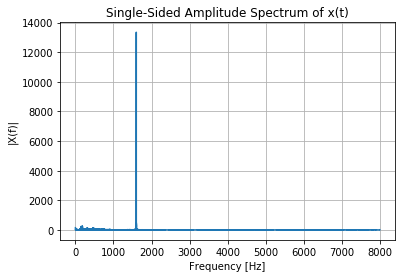

In [22]:
fig, ax = plt.subplots(1, 1)
ax.plot(freq[:half], X_abs[:half])
ax.set_title('Single-Sided Amplitude Spectrum of x(t)')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('|X(f)|')
ax.grid()
plt.show()

Noise Frequency: 1599 Hz

In [23]:
def butter_bandstop_filter(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(N=order, Wn=[low, high], btype='bandstop')
    return b, a